In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [7]:
df.dtypes

timestamp      object
impressions     int64
clicks          int64
dtype: object

In [25]:
df.head(5)

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [29]:
df.sort_values(by='timestamp' , inplace=True)

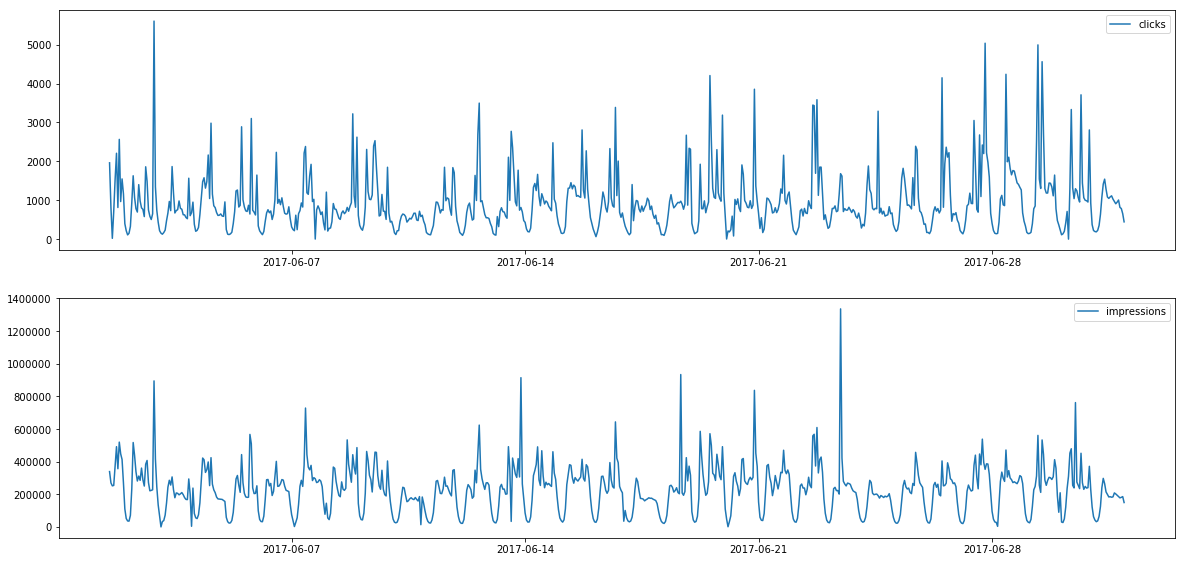

In [81]:
plt.figure(1)
fig = plt.figure(figsize=(20, 15)) 
ax1 = plt.subplot(311)

plt.plot('timestamp', 'clicks', data=df , label="clicks")
#plt.setp(ax1.get_xticklabels(), fontsize=6)
ax2 = plt.subplot(312 , sharex = ax1)
ax1.legend()
plt.plot('timestamp', 'impressions', data=df , label = "impressions")
#plt.setp(ax2.get_xticklabels(), visible=False)
ax2.legend()
plt.show()

In [157]:
temp_df = df
temp_df['comulative'] = df['impressions']*df['clicks']


In [158]:
clicks = df[['timestamp','clicks']]

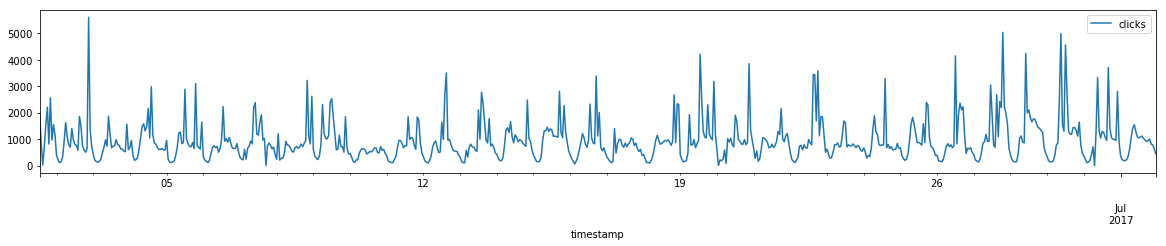

In [159]:
clicks.plot(x='timestamp',y='clicks', label='clicks')
plt.legend()
plt.show()

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  from ipykernel import kernelapp as app
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


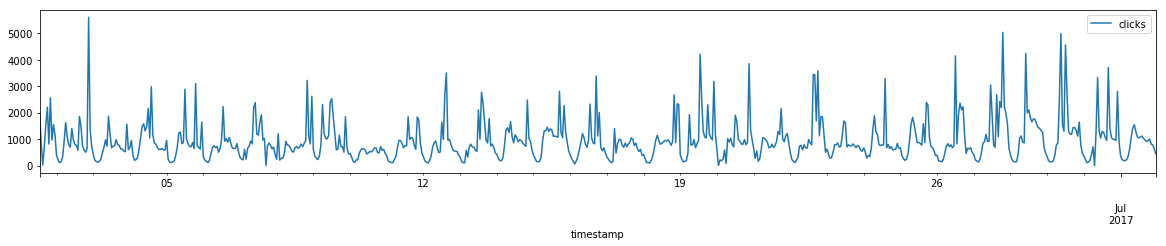

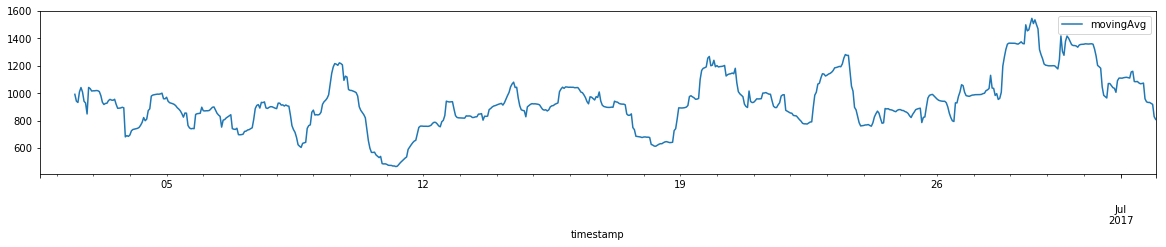

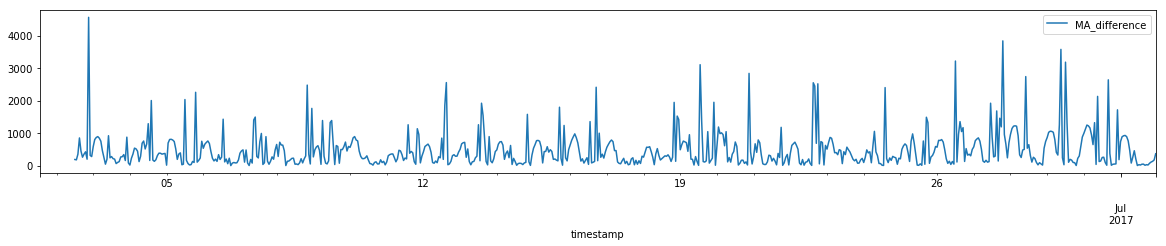

In [170]:
m_average = pd.DataFrame()
m_average['clicks'] = pd.rolling_mean(clicks['clicks'],24)
m_average['timestamp'] = df['timestamp']
clicks['difference'] = clicks['clicks'] - m_average['clicks']
clicks['difference']= clicks['difference'].abs()
plt.figure(32)
clicks.plot(x='timestamp',y='clicks',label='clicks')
m_average.plot(x='timestamp', y='clicks' ,label='movingAvg')
clicks.plot(x='timestamp',y='difference',label='MA_difference')
plt.legend()
plt.show()

In [161]:
clicks['difference'].describe()

count     710.000000
mean      494.002497
std       563.880707
min         0.272727
25%       119.897727
50%       305.704545
75%       700.125000
max      4593.818182
Name: difference, dtype: float64

In [528]:
clicks['anomalies'] = np.where(clicks['difference'] <= clicks['difference'].describe()[6] , 0, 1)

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [533]:
clicks['anomalies'].value_counts()

0    531
1    200
Name: anomalies, dtype: int64

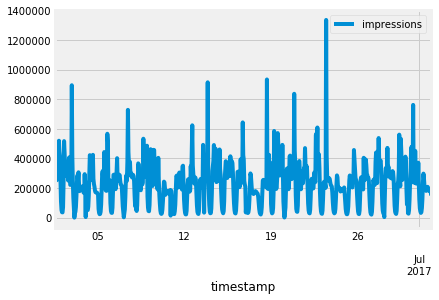

In [544]:
impressions = df[['timestamp','impressions']]
plt.figure(figsize=(20, 6))
impressions.plot(x='timestamp',y='impressions', label='impressions')
plt.legend()
plt.show()

In [534]:
impressions_m_average = pd.DataFrame()

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  if __name__ == '__main__':
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


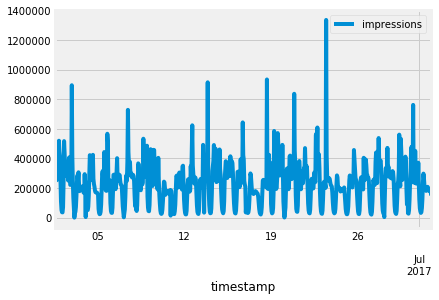

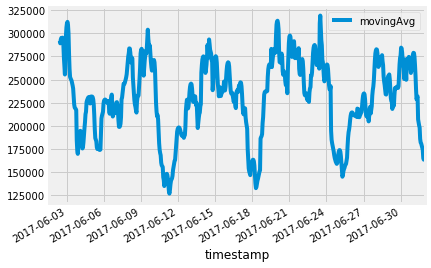

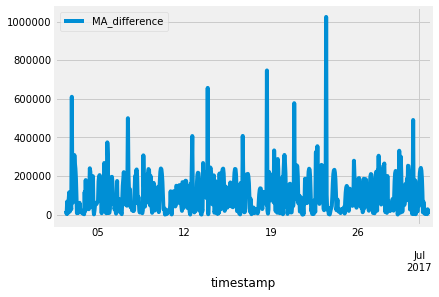

In [535]:
impressions_m_average['impressions'] = pd.DataFrame(pd.rolling_mean(impressions['impressions'],22))
impressions_m_average['timestamp'] = df['timestamp']
impressions['difference'] = impressions['impressions'] - impressions_m_average['impressions']
impressions['difference']= impressions['difference'].abs()
plt.figure(32)
impressions.plot(x='timestamp',y='impressions',label='impressions')
impressions_m_average.plot(x='timestamp', y='impressions' ,label='movingAvg')
impressions.plot(x='timestamp',y='difference',label='MA_difference')
plt.legend()
plt.show()

In [536]:
impressions['difference'].describe()

count    7.100000e+02
mean     1.025275e+05
std      1.006075e+05
min      1.777273e+01
25%      2.714253e+04
50%      7.056498e+04
75%      1.634649e+05
max      1.024921e+06
Name: difference, dtype: float64

In [537]:
impressions['anomalies'] = np.where(impressions['difference'] <= impressions['difference'].describe()[6] , 0, 1)

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


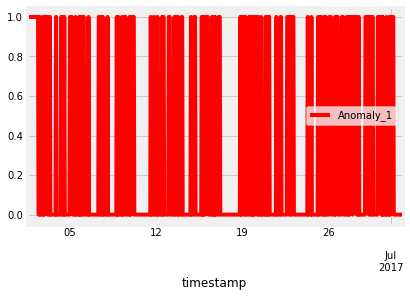

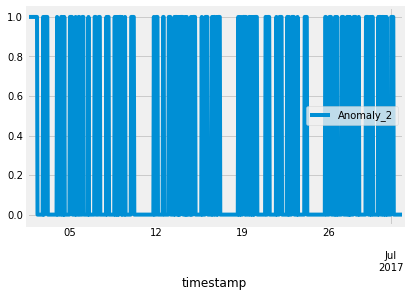

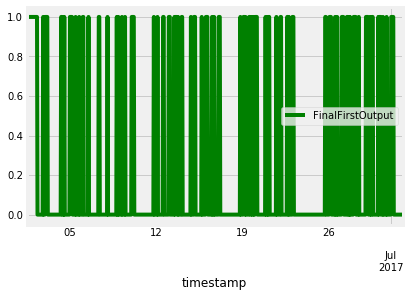

              timestamp  clicks  difference  anomalies
726 2017-06-01 13:00:00    1962         NaN          1
728 2017-06-01 14:00:00     813         NaN          1
730 2017-06-01 15:00:00      20         NaN          1
729 2017-06-01 16:00:00     708         NaN          1
724 2017-06-01 17:00:00    1533         NaN          1


0    583
1    148
Name: firstoutput, dtype: int64

In [539]:
temp_df['firstoutput'] = clicks['anomalies'] * impressions['anomalies']

plt.figure(5)
clicks.plot(x='timestamp', y='anomalies' ,label='Anomaly_1' , color='r')
impressions.plot(x='timestamp', y='anomalies' ,label='Anomaly_2')
temp_df.plot(x='timestamp', y='firstoutput' ,label='FinalFirstOutput', color='g')

#plt.plot(x=clicks['timestamp'], y=clicks['anomalies'] ,label='Anomaly_1')
plt.legend()
plt.show()
print(clicks.head(5))
temp_df['firstoutput'].value_counts()

# Better moving average

In [561]:
c_clicks = df[['timestamp','clicks']]
c_clicks = c_clicks.assign(seq = list(np.arange(0,len(c_clicks))))

c_impressions = df[['timestamp', 'impressions']]
c_impressions = c_impressions.assign(seq = list(np.arange(0,len(c_impressions))))

c_comulative = temp_df[['timestamp' , 'comulative']]
c_comulative = c_comulative.assign(seq = list(np.arange(0,len(c_comulative))))



In [420]:
list(c_clicks.columns)[1]

'clicks'

In [421]:
from __future__ import division
from itertools import count 
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [422]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


In [423]:
def explain_anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


In [424]:
df.dtypes

timestamp      datetime64[ns]
impressions             int64
clicks                  int64
comulative              int64
firstoutput             int64
dtype: object

In [573]:
def plot_results(x, y, window_size, frame , colname , sigma_value=1 , text_xlabel="X Axis", text_ylabel="Y Axis",
                 applying_rolling_std=False ):
    plt.figure(figsize=(15, 5))
    plt.plot(x, y)
       
    frame = frame.assign(anomalies = list(np.zeros(len(frame))))
    print(colname)
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='blue')
    #plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    
    
    # Query for the anomalies and plot the same
    events = {}
 
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)
    print(events)
    x_anomaly = np.fromiter(events['anomalies_dict'].keys() , dtype=int , count=len(events['anomalies_dict']))
    print(x_anomaly)
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=int,count=len(events['anomalies_dict']))
    print(y_anomaly)
    plt.plot(x_anomaly , y_anomaly , 'r^')
    
    count = 0 
    for j in range(0,len(y_anomaly)):
         
        for i in range(0,len(frame)):  
            if frame[colname][i] == y_anomaly[j] :
                frame['anomalies'][i] = 1
                count+=1
    print("count",count)
    return frame

    # add grid and lines and enable the plot
    #plt.grid(True)
    #plt.show()
    

clicks
{'standard_deviation': 615.742, 'anomalies_dict': OrderedDict([(0, 1962), (7, 2565), (32, 5607), (73, 2982), (95, 2889), (102, 3102), (120, 2232), (175, 3222), (178, 2622), (185, 2307), (265, 2691), (266, 3498), (289, 2772), (319, 2478), (340, 2808), (364, 3387), (415, 2673), (417, 2337), (418, 2313), (425, 1926), (432, 4206), (441, 3189), (464, 3855), (506, 3447), (507, 3432), (509, 3585), (553, 3290), (580, 2388), (599, 4149), (622, 3051), (630, 5038), (645, 4239), (668, 4995), (671, 4563), (692, 3333), (699, 3711), (705, 2808)])}
[  0   7  32  73  95 102 120 175 178 185 265 266 289 319 340 364 415 417
 418 425 432 441 464 506 507 509 553 580 599 622 630 645 668 671 692 699
 705]
[1962 2565 5607 2982 2889 3102 2232 3222 2622 2307 2691 3498 2772 2478 2808
 3387 2673 2337 2313 1926 4206 3189 3855 3447 3432 3585 3290 2388 4149 3051
 5038 4239 4995 4563 3333 3711 2808]


/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count 39


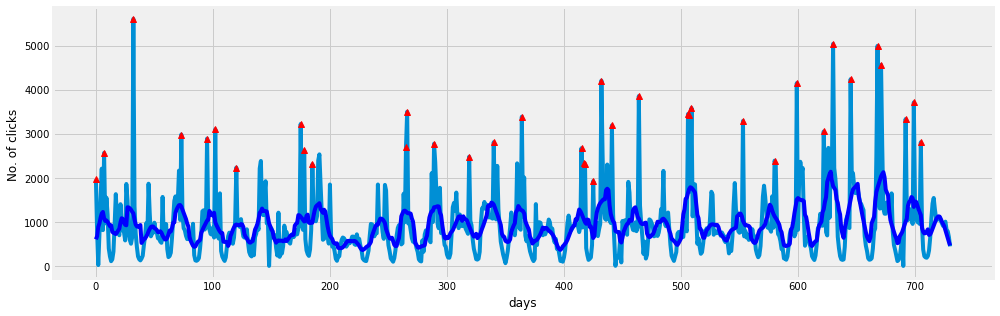

In [574]:
c_clicks = plot_results(c_clicks["seq"], y=c_clicks["clicks"], window_size=12,frame = c_clicks, colname = list(c_clicks.columns)[1] ,text_xlabel="days", sigma_value=2.0,
             text_ylabel="No. of clicks " )


impressions
{'standard_deviation': 113999.101, 'anomalies_dict': OrderedDict([(17, 517316), (32, 894791), (101, 566961), (102, 509964), (141, 728489), (178, 486158), (185, 462588), (266, 624056), (289, 34142), (296, 914589), (364, 643747), (411, 933741), (425, 585831), (441, 491907), (464, 837035), (469, 41093), (470, 39418), (526, 1335919), (668, 561012), (695, 761956)])}
[ 17  32 101 102 141 178 185 266 289 296 364 411 425 441 464 469 470 526
 668 695]
[ 517316  894791  566961  509964  728489  486158  462588  624056   34142
  914589  643747  933741  585831  491907  837035   41093   39418 1335919
  561012  761956]


/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count 20


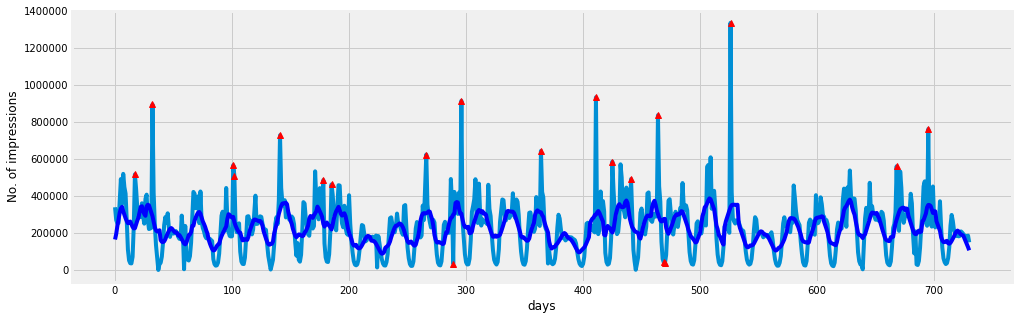

In [575]:
c_impressions = plot_results(c_impressions["seq"], y=c_impressions["impressions"], window_size=12, frame = c_impressions ,  colname = list(c_impressions.columns)[1] , text_xlabel="days", sigma_value=2.0,
             text_ylabel="No. of impressions")

comulative
{'standard_deviation': 373061089.952, 'anomalies_dict': OrderedDict([(7, 1333256220), (32, 5017093137), (73, 1266002136), (95, 1280956599), (102, 1581908328), (141, 1735260798), (175, 1426495392), (178, 1274706276), (185, 1067190516), (266, 2182947888), (319, 1142038338), (364, 2180371089), (425, 1128310506), (432, 2403304194), (441, 1568691423), (464, 3226769925), (506, 1923615585), (507, 1948710192), (509, 2184258045), (526, 2248351677), (599, 1678627314), (630, 1778645748), (645, 1998463833), (668, 2802254940), (671, 2432553552), (692, 1597040280), (699, 1675690917)])}
[  7  32  73  95 102 141 175 178 185 266 319 364 425 432 441 464 506 507
 509 526 599 630 645 668 671 692 699]
[1333256220 5017093137 1266002136 1280956599 1581908328 1735260798
 1426495392 1274706276 1067190516 2182947888 1142038338 2180371089
 1128310506 2403304194 1568691423 3226769925 1923615585 1948710192
 2184258045 2248351677 1678627314 1778645748 1998463833 2802254940
 2432553552 1597040280 16756909

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count 27


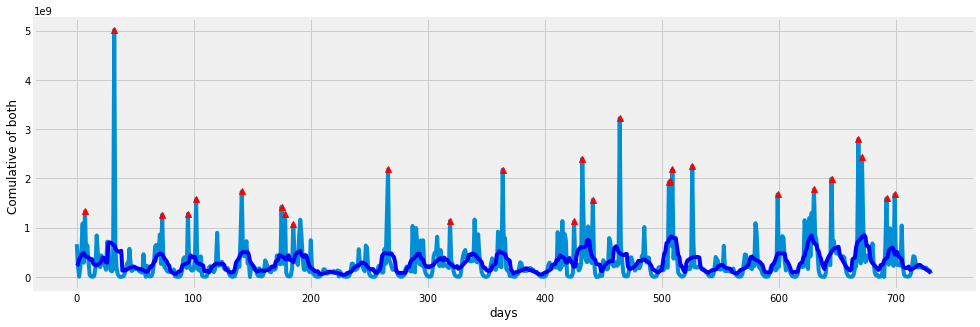

In [576]:
c_comulative = plot_results(c_comulative["seq"], y=c_comulative["comulative"], window_size=12, frame = c_comulative ,  colname = list(c_comulative.columns)[1] , text_xlabel="days", sigma_value=2.0,
             text_ylabel="Comulative of both ")

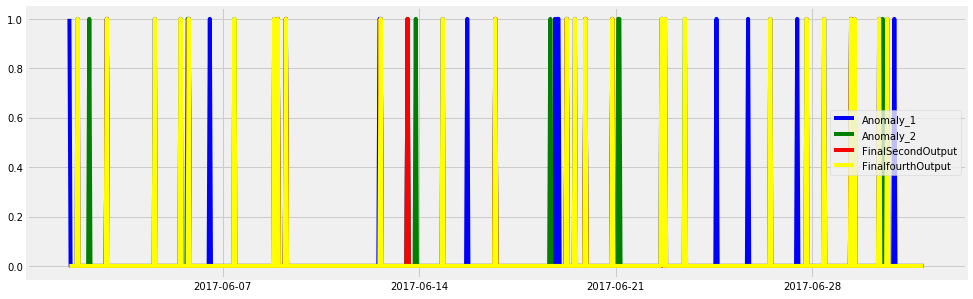

AttributeError: 'Series' object has no attribute 'counts_value'

In [578]:
temp_df['secondoutput'] = c_clicks['anomalies'] * c_impressions['anomalies']
temp_df['fourthoutput'] = c_comulative['anomalies']
plt.figure(figsize=(15, 5))
plt.plot(c_clicks['timestamp'], c_clicks['anomalies'] ,label='Anomaly_1' , color='b')
plt.plot(c_impressions['timestamp'],c_impressions['anomalies'] ,label='Anomaly_2' , color='g')
plt.plot(temp_df['timestamp'], temp_df['secondoutput'] ,label='FinalSecondOutput', color='r')
plt.plot(temp_df['timestamp'], temp_df['fourthoutput'] ,label='FinalfourthOutput', color='yellow')

#plt.plot(x=clicks['timestamp'], y=clicks['anomalies'] ,label='Anomaly_1')
plt.legend()
plt.show()
#print(clicks.head(5))


# Hot Wild Exponential Smooting 

In [460]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        val = series[i]
        last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
        trend = beta * (smooth-last_smooth) + (1-beta)*trend
        seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
        result.append(smooth+trend+seasonals[i%slen])
    return result




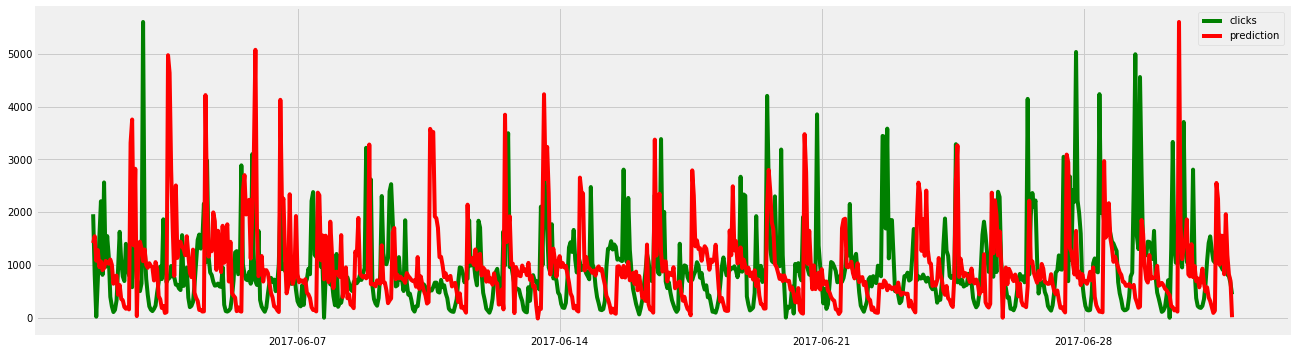

In [504]:
h_clicks = df[['timestamp','clicks']]
result = triple_exponential_smoothing(h_clicks['clicks'], 50, 0.8, 0.029, 0.893)
plt2.figure(figsize=(20, 6))
plt2.plot( h_clicks['timestamp'] ,h_clicks['clicks'] , 'g' , label = "clicks")
plt2.plot( h_clicks['timestamp'] ,result , 'r' , label ="prediction")
plt2.legend()
plt2.show()
t = pd.DataFrame(result)
h_clicks = h_clicks.assign(difference = (h_clicks["clicks"] - t[0]).abs()) 

In [505]:
h_clicks["difference"].describe()
h_clicks = h_clicks.assign(anomalies = np.where(h_clicks['difference'] <= h_clicks['difference'].describe()[6] , 0, 1) )

In [506]:
h_clicks['anomalies'].value_counts()

0    548
1    183
Name: anomalies, dtype: int64

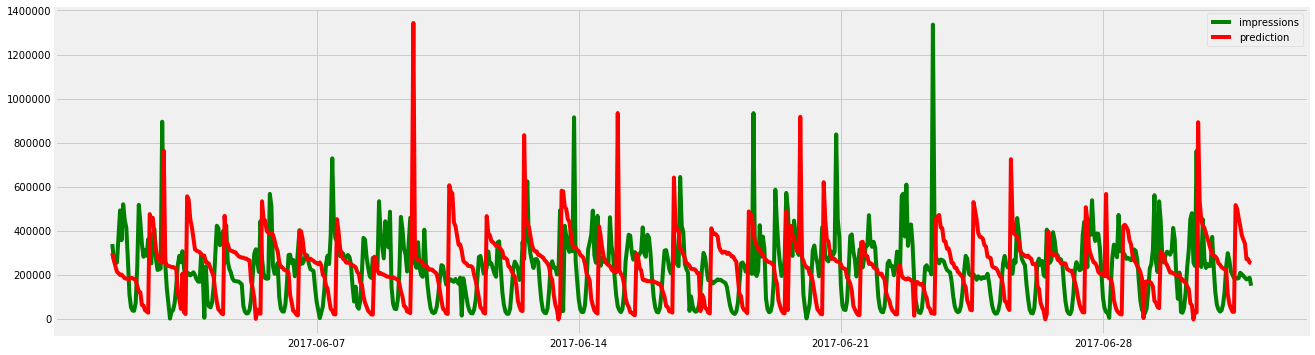

In [507]:
h_impressions = df[['timestamp','impressions']]
result = triple_exponential_smoothing(h_impressions['impressions'], 50, 0.8, 0.029, 0.893)
plt2.figure(figsize=(20, 6))
plt2.plot( h_impressions['timestamp'] ,h_impressions['impressions'] , 'g' , label = "impressions")
plt2.plot( h_impressions['timestamp'] ,result , 'r' , label ="prediction")
plt2.legend()
plt2.show()
ts = pd.DataFrame(result)
h_impressions = h_impressions.assign(difference = (h_impressions["impressions"] - ts[0]).abs()) 

In [508]:
h_impressions["difference"].describe()
h_impressions = h_impressions.assign(anomalies = np.where(h_impressions['difference'] <= h_impressions['difference'].describe()[6] , 0, 1) )

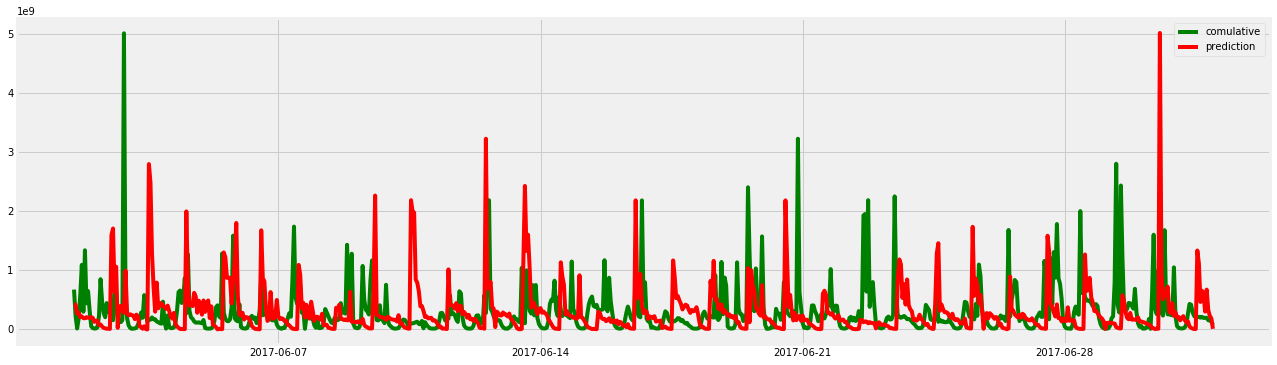

In [582]:
h_comulative = temp_df[['timestamp','comulative']]
result = triple_exponential_smoothing(h_comulative['comulative'], 50, 0.8, 0.029, 0.893)
plt2.figure(figsize=(20, 6))
plt2.plot( h_comulative['timestamp'] ,h_comulative['comulative'] , 'g' , label = "comulative")
plt2.plot( h_comulative['timestamp'] ,result , 'r' , label ="prediction")
plt2.legend()
plt2.show()
ts = pd.DataFrame(result)
h_comulative = h_comulative.assign(difference = (h_comulative["comulative"] - ts[0]).abs()) 

In [587]:
print(h_comulative["difference"].describe())
h_comulative = h_comulative.assign(anomalies = np.where(h_comulative['difference'] <= h_comulative['difference'].describe()[6] , 0, 1) )
h_comulative['anomalies'].value_counts()

count    7.310000e+02
mean     6.410910e+06
std      8.384984e+06
min      0.000000e+00
25%      2.225592e+06
50%      4.387018e+06
75%      7.216768e+06
max      1.068778e+08
Name: difference, dtype: float64


0    548
1    183
Name: anomalies, dtype: int64

In [588]:
h_comulative['anomalies'].value_counts()

0    548
1    183
Name: anomalies, dtype: int64

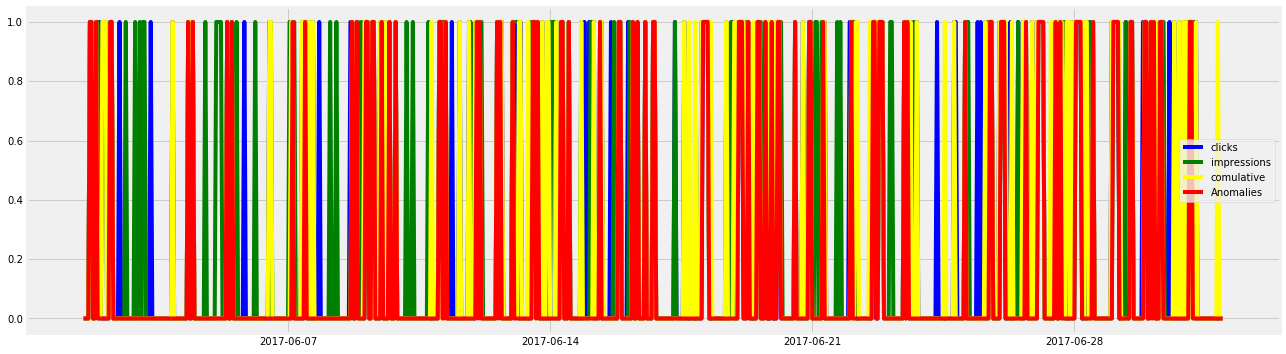

0    631
1    100
Name: thirdoutput, dtype: int64

In [590]:
temp_df['thirdoutput'] = h_clicks['anomalies'] * h_impressions['anomalies'] * h_comulative["anomalies"]
plt2.figure(figsize=(20, 6))
plt2.plot(h_clicks["timestamp"] , h_clicks["anomalies"] ,'blue' , label = "clicks")
plt2.plot(h_impressions["timestamp"] , h_impressions["anomalies"] ,'green' , label = "impressions")
plt2.plot(h_comulative["timestamp"] , h_comulative["anomalies"] ,'yellow' , label = "comulative")

plt2.plot(temp_df["timestamp"] , temp_df["thirdoutput"] ,'red' , label = "Anomalies")

#plt.plot(x=clicks['timestamp'], y=clicks['anomalies'] ,label='Anomaly_1')
plt2.legend()
plt2.show()
#print(clicks.head(5))
temp_df['thirdoutput'].value_counts()

# Arima Model 

In [607]:
from statsmodels.tsa.stattools import adfuller


In [613]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24)
    rolstd = pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


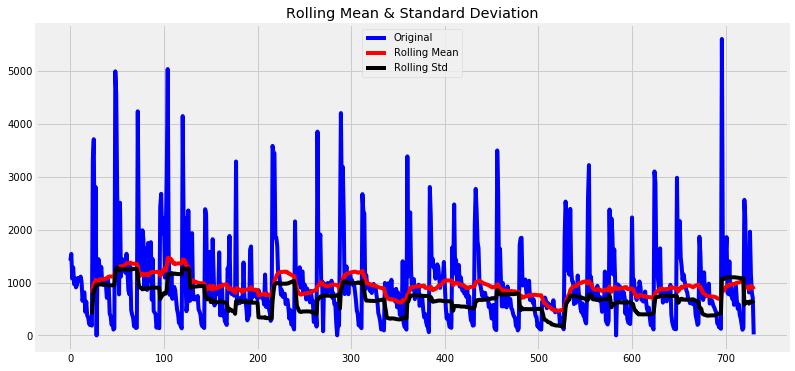

Results of Dickey-Fuller Test:
Test Statistic                -1.637355e+01
p-value                        2.795255e-29
#Lags Used                     0.000000e+00
Number of Observations Used    7.300000e+02
Critical Value (1%)           -3.439340e+00
Critical Value (5%)           -2.865507e+00
Critical Value (10%)          -2.568883e+00
dtype: float64


In [614]:
a_clicks = df[['timestamp','clicks']]
test_stationarity(a_clicks["clicks"])

/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/zfar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


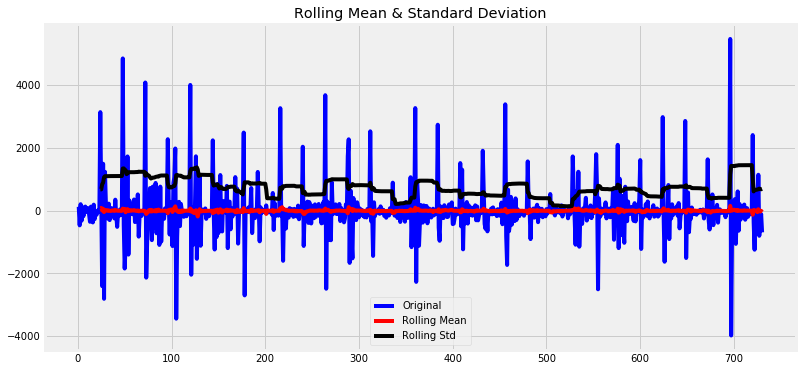

Results of Dickey-Fuller Test:
Test Statistic                -1.288499e+01
p-value                        4.574047e-24
#Lags Used                     2.000000e+01
Number of Observations Used    7.090000e+02
Critical Value (1%)           -3.439607e+00
Critical Value (5%)           -2.865625e+00
Critical Value (10%)          -2.568945e+00
dtype: float64


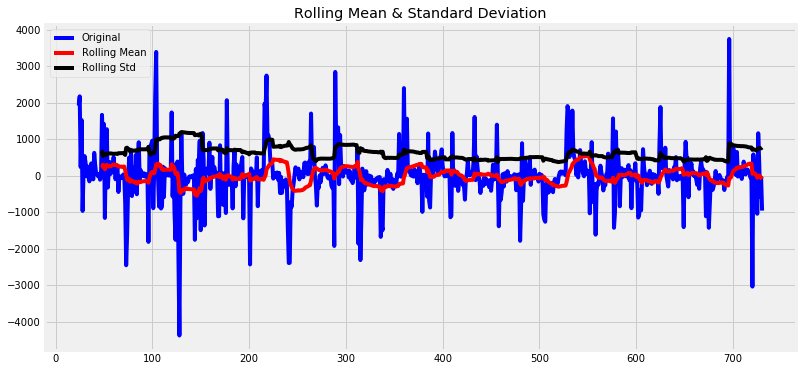

Results of Dickey-Fuller Test:
Test Statistic                -8.815121e+00
p-value                        1.943688e-14
#Lags Used                     5.000000e+00
Number of Observations Used    7.010000e+02
Critical Value (1%)           -3.439713e+00
Critical Value (5%)           -2.865672e+00
Critical Value (10%)          -2.568970e+00
dtype: float64


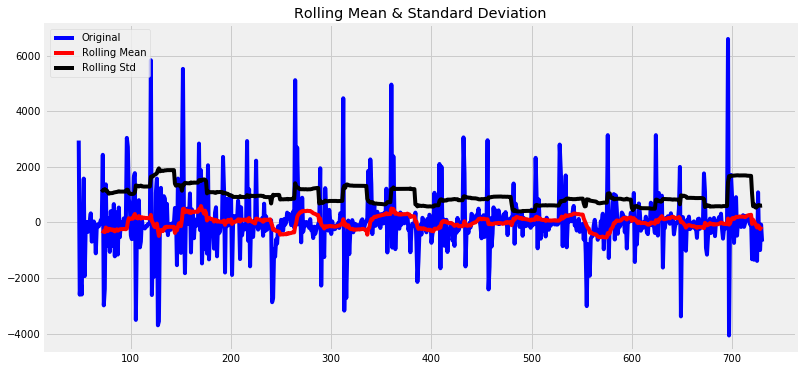

Results of Dickey-Fuller Test:
Test Statistic                -1.017137e+01
p-value                        7.075239e-18
#Lags Used                     4.000000e+00
Number of Observations Used    6.780000e+02
Critical Value (1%)           -3.440032e+00
Critical Value (5%)           -2.865812e+00
Critical Value (10%)          -2.569045e+00
dtype: float64


In [627]:
a_clicks = a_clicks.assign(difference = a_clicks["clicks"] - a_clicks["clicks"].shift(1))
test_stationarity(a_clicks.difference.dropna(inplace = False))

a_clicks = a_clicks.assign(seasonal_difference = a_clicks["clicks"] - a_clicks["clicks"].shift(24))
test_stationarity(a_clicks.seasonal_difference.dropna(inplace = False))

a_clicks = a_clicks.assign(seasonal_first_difference = a_clicks["difference"] - a_clicks["seasonal_difference"].shift(24))
test_stationarity(a_clicks.seasonal_first_difference.dropna(inplace = False))

# Inverse Correlation Between clicks and impressions

In [628]:
df.head(5)

,timestamp,impressions,clicks,comulative,firstoutput,secondoutput,thirdoutput,finaloutput,fourthoutput
0,2017-07-01 08:00:00,297672,1416,421503552,0,0.0,0,0,0.0
1,2017-07-01 09:00:00,265209,1542,408952278,0,0.0,0,0,0.0
2,2017-07-01 07:00:00,240436,1077,258949572,0,0.0,0,0,0.0
3,2017-07-01 10:00:00,214899,1287,276575013,0,0.0,0,0,0.0
4,2017-07-01 16:00:00,208606,969,202139214,0,0.0,0,0,0.0


# ensamble 

In [545]:
import statsmodels.tsa.arima_model import ARIMA

SyntaxError: invalid syntax (<ipython-input-545-6ba431d84b60>, line 1)

In [524]:
temp_df.head(5)

,timestamp,impressions,clicks,comulative,firstoutput,secondoutput,thirdoutput
726,2017-06-01 13:00:00,339290,1962,665686980,0,0.0,0
728,2017-06-01 14:00:00,269945,813,219465285,0,0.0,0
730,2017-06-01 15:00:00,251952,20,5039040,0,0.0,0
729,2017-06-01 16:00:00,254507,708,180190956,0,0.0,0
724,2017-06-01 17:00:00,373367,1533,572371611,0,0.0,1


In [596]:
temp_df["finaloutput"] = np.where( temp_df["firstoutput"] + temp_df["secondoutput"] + temp_df["thirdoutput"] + temp_df["fourthoutput"] >= 3 , 1 , 0)


In [600]:
temp_df["fourthoutput"].value_counts()

0.0    704
1.0     27
Name: fourthoutput, dtype: int64

In [601]:
final_result = pd.read_csv("applicant_data.csv")
final_result["prediction"] = np.zeros(len(final_result))

In [605]:
temp_df.sort_index(inplace=True)
final_result["prediction"] = temp_df["finaloutput"]

In [606]:
final_result["prediction"].value_counts()

0    714
1     17
Name: prediction, dtype: int64